In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [4]:
sd=pd.read_csv(r"C:\Users\megha\Downloads\Sales_Data.csv")

In [5]:
sd.head()

,Transaction ID,Date,Product Category,Product Name,Quantity Sold,Unit Price,Total Revenue,Region
0,2cac9657-8ec1-4630-aae3-c5509bac12c2,2024-02-12,Electronics,Many,1,372.07,372.07,South
1,05b6b1f0-a0ce-42bc-b1a5-bdc267f46bf0,2024-07-13,Clothing,Rate,5,369.55,1847.75,North
2,d0554257-5cd5-4445-9d54-a309697b7594,2024-04-11,Toys,Modern,14,20.73,290.22,North
3,bb50c0c1-106c-4172-ae74-9f949c0ce005,2024-08-23,Clothing,Job,8,255.15,2041.20,North
4,e30109e2-3933-4f8b-aad0-61a17ac8d1d3,2024-12-11,Toys,Paper,7,359.43,2516.01,West


In [6]:
sd.isnull().sum()

Transaction ID       0
Date                 0
Product Category     0
Product Name         0
Quantity Sold        0
Unit Price           0
Total Revenue       10
Region               0
dtype: int64

In [7]:
sd.rename(columns={'Total Revenue': 'Total_Revenue'}, inplace=True)

In [8]:
sd.rename(columns={'Quantity Sold': 'Quantity_Sold'}, inplace=True)

In [9]:
sd.rename(columns={'Unit Price': 'Unit_Price'}, inplace=True)

In [12]:
sd.Total_Revenue.fillna(sd.Total_Revenue.mean(),inplace =True)

In [13]:
sd.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Quantity_Sold       0
Unit_Price          0
Total_Revenue       0
Region              0
dtype: int64

In [14]:
sd.isnull().sum()[sd.isnull().sum()>0]

Series([], dtype: int64)

In [16]:
sd.select_dtypes(include='object').columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name', 'Region'], dtype='object')

In [17]:
print(sd['Quantity_Sold'].describe())

count    1005.000000
mean       10.751244
std         5.877722
min         1.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        20.000000
Name: Quantity_Sold, dtype: float64


In [18]:
print(sd['Unit_Price'].describe())

count    1005.000000
mean      245.456498
std       142.508080
min         5.080000
25%       123.530000
50%       241.340000
75%       372.070000
max       499.990000
Name: Unit_Price, dtype: float64


In [19]:
print(sd['Total_Revenue'].describe())

count    1005.000000
mean     2595.088382
std      2197.440465
min         8.270000
25%       762.400000
50%      2041.200000
75%      3966.840000
max      9981.600000
Name: Total_Revenue, dtype: float64


In [22]:
df = pd.DataFrame(sd)

df['Total_Revenue'] = df['Quantity_Sold'] * df['Unit_Price']

df_sorted = df.sort_values(by='Total_Revenue', ascending=False)


In [23]:
df_sorted

,Transaction ID,Date,Product Category,Product Name,Quantity_Sold,Unit_Price,Total_Revenue,Region
416,4482a990-a788-4c13-9b09-4d71ebf7464b,2024-11-26,Home Goods,Seek,20,499.08,9981.60,East
835,c78e0db3-25c9-44ba-973e-11698ab7284d,2024-10-08,Home Goods,Keep,20,492.71,9854.20,West
186,9000ce0c-d326-487c-b26f-792db4c6c60f,2024-08-17,Home Goods,Ball,19,495.07,9406.33,East
601,128934b1-54f5-417e-aac6-44da2eceea5a,2024-11-13,Home Goods,Prove,19,488.78,9286.82,North
489,4bf9f8eb-427b-47e9-8c92-4b5b7d92326c,2024-04-13,Toys,Television,20,460.66,9213.20,North
...,...,...,...,...,...,...,...,...
921,138bbf56-7022-4560-9122-5af96fa689d3,2024-11-28,Books,Partner,1,23.67,23.67,South
512,3a2b7411-1229-46d1-a17a-78b172b2f70d,2024-04-14,Home Goods,Budget,2,9.59,19.18,North
324,2162d085-b79d-4f0f-a2be-c70d89e9ee6d,2024-02-17,Toys,Such,2,8.81,17.62,East
917,8dd11886-f718-4156-a0b4-a367af6183cd,2025-01-09,Home Goods,Among,2,7.33,14.66,East


# Identify the top 5 best-selling products and their revenue contributions.

In [28]:
top_5 = df_sorted.head(5)

total_revenue = df['Total_Revenue'].sum()

top_5['Revenue Contribution (%)'] = (top_5['Total_Revenue'] / total_revenue) * 100

print("Top 5 Best-Selling Products and Revenue Contribution:")
print(top_5[['Product Category', 'Total_Revenue', 'Revenue Contribution (%)']])

Top 5 Best-Selling Products and Revenue Contribution:
    Product Category  Total_Revenue  Revenue Contribution (%)
416       Home Goods        9981.60                  0.383469
835       Home Goods        9854.20                  0.378575
186       Home Goods        9406.33                  0.361369
601       Home Goods        9286.82                  0.356777
489             Toys        9213.20                  0.353949


C:\Users\megha\AppData\Local\Temp\ipykernel_22836\1670914242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5['Revenue Contribution (%)'] = (top_5['Total_Revenue'] / total_revenue) * 100


# Determine which region generates the highest total revenue and which region has the lowest average revenue per transaction.


In [31]:
df = pd.DataFrame(df)

region_summary = df.groupby('Region').agg(
    Total_Revenue=('Total_Revenue', 'sum'),
    Average_Revenue=('Total_Revenue', 'mean')
).reset_index()

highest_total_revenue_region = region_summary.loc[region_summary['Total_Revenue'].idxmax(), 'Region']

lowest_avg_revenue_region = region_summary.loc[region_summary['Average_Revenue'].idxmin(), 'Region']

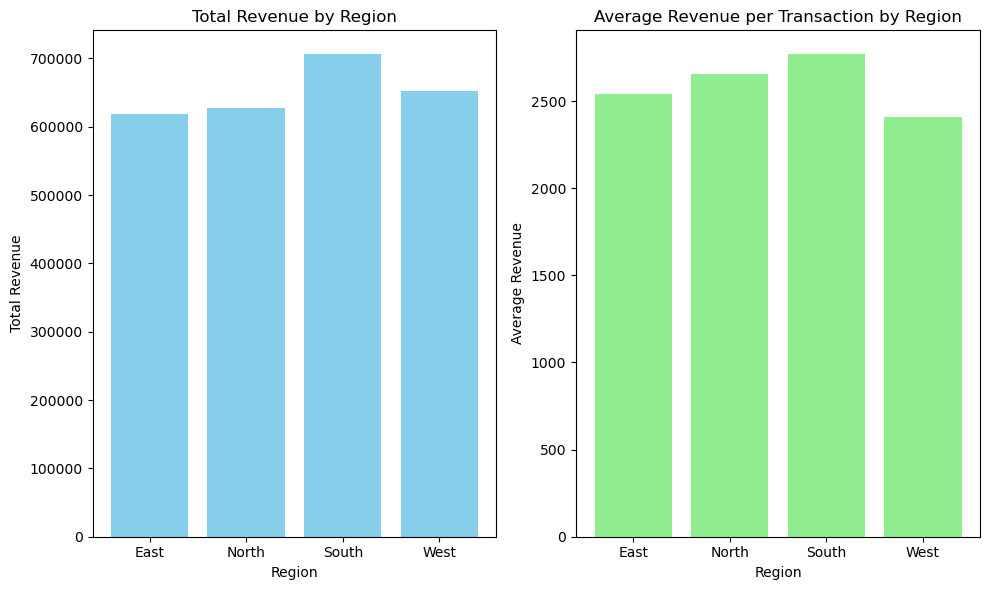

Region with the highest total revenue: South
Region with the lowest average revenue per transaction: West


In [36]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(region_summary['Region'], region_summary['Total_Revenue'], color='skyblue')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')

plt.subplot(1, 2, 2)
plt.bar(region_summary['Region'], region_summary['Average_Revenue'], color='lightgreen')
plt.title('Average Revenue per Transaction by Region')
plt.xlabel('Region')
plt.ylabel('Average Revenue')

plt.tight_layout()
plt.show()

print(f"Region with the highest total revenue: {highest_total_revenue_region}")
print(f"Region with the lowest average revenue per transaction: {lowest_avg_revenue_region}")

# Plot a time-series chart showing trends in total revenue over time.


In [21]:
#df['Date'] = pd.to_datetime(df['Date'])

In [37]:
df.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Quantity_Sold', 'Unit_Price', 'Total_Revenue', 'Region'],
      dtype='object')

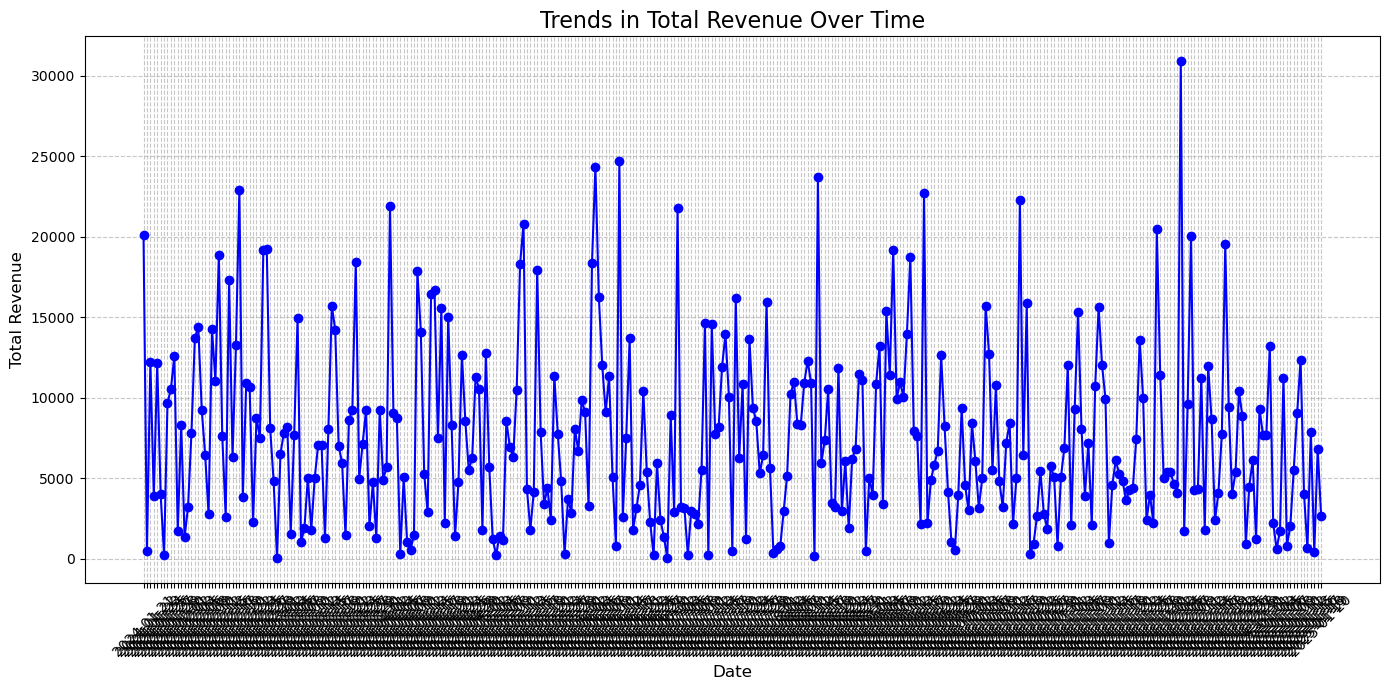

In [41]:
revenue_trend = df.groupby('Date')['Total_Revenue'].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(revenue_trend['Date'], revenue_trend['Total_Revenue'], marker='o', linestyle='-', color='blue')

plt.title('Trends in Total Revenue Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()